### Imports

In [20]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mira.sources.sbml import template_model_from_sbml_file

# Path to the utils directory and add to path
script_path = os.path.abspath(os.path.join(os.pardir, os.pardir, 'utils'))
if script_path not in sys.path:
    sys.path.append(script_path)

# Load the autoreload extension
%load_ext autoreload
%autoreload 2

import community_modeling

# Get Python version
print(f"Python Version: {sys.version}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python Version: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:35:25) [Clang 16.0.6 ]


## Exploratory data analysis

In [7]:
smetana_file = "../data/smetana_results/smetana_results_gurobi_victor_detailed.tsv"
smetana_df = pd.read_csv(smetana_file, sep='\t')

,community,medium,receiver,donor,compound,scs,mus,mps,smetana
0,all,minimal,updated_csc009,updated_csc031,M_arg__L_e,0.333333,0.08,1,0.026667
1,all,minimal,updated_csc009,updated_csc031,M_gua_e,0.333333,0.10,1,0.033333
2,all,minimal,updated_csc009,updated_csc031,M_h2s_e,0.333333,0.33,1,0.110000
3,all,minimal,updated_csc009,updated_csc031,M_hom__L_e,0.333333,0.07,1,0.023333
4,all,minimal,updated_csc009,updated_csc031,M_nh4_e,0.333333,0.09,1,0.030000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   community  109 non-null    object 
 1   medium     109 non-null    object 
 2   receiver   109 non-null    object 
 3   donor      109 non-null    object 
 4   compound   109 non-null    object 
 5   scs        109 non-null    float64
 6   mus        109 non-null    float64
 7   mps        109 non-null    int64  
 8   smetana    109 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 7.8+ KB


None

,scs,mus,mps,smetana
count,109.000000,109.000000,109.0,109.000000
mean,0.759939,0.293761,1.0,0.242462
std,0.312983,0.299675,0.0,0.293424
min,0.333333,0.010000,1.0,0.003333
25%,0.333333,0.060000,1.0,0.050000
50%,1.000000,0.160000,1.0,0.100000
75%,1.000000,0.430000,1.0,0.330000
max,1.000000,1.000000,1.0,1.000000


/Users/geor228/miniconda3/envs/concerto_carbstor_env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/geor228/miniconda3/envs/concerto_carbstor_env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/geor228/miniconda3/envs/concerto_carbstor_env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


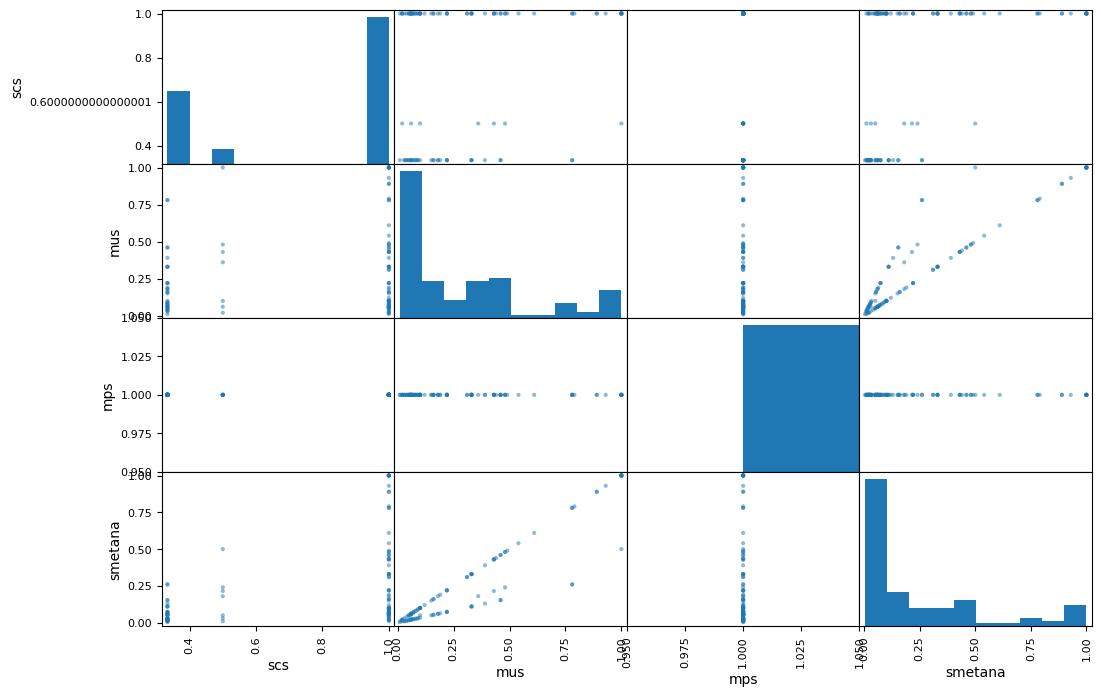

In [11]:
display(smetana_df.head())
display(smetana_df.info())
display(smetana_df.describe())
from pandas.plotting import scatter_matrix

# Scatter plot matrix for numerical columns
scatter_matrix(smetana_df[['scs', 'mus', 'mps', 'smetana']], figsize=(12, 8))
plt.show()

## Convert smetana data into SBML

In [18]:
smetana_community_model_SBML = 'smetana_carbstor_SBML_model.xml'
community_modeling.save_SBML_from_smetana_df(smetana_df,smbl_file=smetana_community_model_SBML)

## Validate SBML for MIRA model

Ensure that the species name, initial_concentrations, and has_substance_units_only fields are set correctly for MIRA.

In [19]:
smetana_community_model_SBML_updated = 'smetana_carbstor_SBML_model_updated.xml'
community_modeling.update_SBML_for_MIRA(original_sbml_file=smetana_community_model_SBML, updated_sbml_file=smetana_community_model_SBML_updated)

## Load SBML into MIRA and assign priors

In [21]:
smetana_model = template_model_from_sbml_file(smetana_community_model_SBML_updated)

ValidationError: 2 validation errors for ReversibleFlux
left -> 0
  value is not a valid dict (type=type_error.dict)
right -> 0
  value is not a valid dict (type=type_error.dict)